In [113]:
import datetime
import operator
import prince
import pprint

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster import hierarchy
from mpl_toolkits.mplot3d import Axes3D

colors = ['green', 'red', 'cyan', 'yellow', 'purple', 'orange', 'blue', 'silver', 'magenta']

In [114]:
def drawPieCharts(data, increment):
    for i in  data['clusters'].unique():
        cluster_gender_dic = {}
        cluster_agegroup_dic = {}
        cluster_channel_dic = {}
        
        for j in np.array(list(zip(gender,data['clusters']))):
            if(int(j[1]) == i):
                if j[0] not in cluster_gender_dic:
                    cluster_gender_dic[j[0]] = 1
                else:
                    cluster_gender_dic[j[0]] = cluster_gender_dic[j[0]] + 1   
                    
        for j in np.array(list(zip(agegroup,data['clusters']))):
            if(int(j[1]) == i):
                if j[0] not in cluster_agegroup_dic:
                    cluster_agegroup_dic[j[0]] = 1
                else:
                    cluster_agegroup_dic[j[0]] = cluster_agegroup_dic[j[0]] + 1   
                    
        for j in np.array(list(zip(channel,data['clusters']))):
            if(int(j[1]) == i):
                if j[0] not in cluster_channel_dic:
                    cluster_channel_dic[j[0]] = 1
                else:
                    cluster_channel_dic[j[0]] = cluster_channel_dic[j[0]] + 1  

        
        gender_keys = list(cluster_gender_dic.keys())
        gender_values = list(cluster_gender_dic.values())
        
        agegroup_keys = list(cluster_agegroup_dic.keys())
        agegroup_values = list(cluster_agegroup_dic.values())
        
        channel_keys = list(cluster_channel_dic.keys())
        channel_values = list(cluster_channel_dic.values())
        
        agegroup_str = ["(" + suit + ")" for suit in agegroup_keys]
        
        print("Cluster " + str(int(i) + increment) )
        plt.pie(gender_values, labels=gender_keys, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180,radius=3,textprops={'fontsize': 18})       
        plt.show()
                
        
        plt.pie(agegroup_values, labels=agegroup_str, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180,radius=3,textprops={'fontsize': 18},pctdistance=1.1,labeldistance=1.2)       
        plt.show()
        
        
        plt.pie(channel_values, labels=channel_keys, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180,radius=3,textprops={'fontsize': 18})       
        plt.show()

In [115]:
def fitAndDrawKmeans(cluster_count, data, colors):
    kmeans = KMeans(n_clusters = cluster_count, init='k-means++', random_state=0)
    clusters = kmeans.fit_predict(data)
    data['clusters'] = clusters
    fig = plt.figure(figsize=(15,10))
    dx = fig.add_subplot(111, projection='3d')

    for i in range(0, cluster_count):
        dx.scatter(data[data.clusters == i].recency, 
                   data[data.clusters == i].frequency, 
                   data[data.clusters == i].monetary, 
                   c = colors[i], 
                   label = 'Cluster ' + str(i+1), 
                   s=50)

    dx.set_title('Clusters of clients')
    dx.set_xlabel('Recency')
    dx.set_ylabel('Frequency')
    dx.set_zlabel('Monetary')
    dx.legend()    
    draw2D(data, clusters, cluster_count, colors)
    print(data.groupby('clusters').count()["recency"])
    drawPieCharts(data, 1)
    #cluster.groupby(cluster).count()
       
def draw2D(data, clusters, n_clusters_, colors):
    data = data.drop(["clusters"], axis=1)
    pca = PCA(n_components=2)
    data = pca.fit_transform(data);
    data = pd.DataFrame({'Dim1':data[:,0],'Dim2':data[:,1]})
    data['clusters'] = clusters
    fig = plt.figure(figsize=(15,10))
    dx = fig.add_subplot(111)
    for i in range(0, n_clusters_):
        dx.scatter(data[data.clusters == i].Dim1, 
                   data[data.clusters == i].Dim2, 
                   c = colors[i], 
                   label = 'Cluster ' + str(i+1), 
                   s=50)

    dx.set_title('Clusters of clients')
    dx.set_xlabel('Dim1')
    dx.set_ylabel('Dim2')
    dx.legend()
    
def drawDemographicPieCharts(cluster):
    pass
    
def calculateAgeGroup(row):
    if row['age'] < 18:
        return '12-17'
    elif row['age'] >= 18 and row['age'] < 25:
        return '18-24'
    elif row['age'] >= 25 and row['age'] < 35:
        return '25-34'
    elif row['age'] >= 35 and row['age'] < 45:
        return '35-44'
    elif row['age'] >= 45 and row['age'] < 55:
        return '45-54'
    elif row['age'] >= 55 and row['age'] < 65:
        return '55-64'
    elif row['age'] >= 65 and row['age'] < 100:
        return '>65'
    else:
        return '>65'

# DATA'NIN ÖZETİ

In [116]:
take_nrows = 10000
print("Start:",datetime.datetime.now())
rfm_scores = pd.read_csv("..\\dataset.csv", sep=';', nrows = take_nrows)
rfm_scores["recency"] = pd.to_numeric(rfm_scores["recency"])
rfm_scores["frequency"] = pd.to_numeric(rfm_scores["frequency"])
rfm_scores["monetary"] = pd.to_numeric(rfm_scores["monetary"])
rfm_scores["agegroup"] = rfm_scores.apply(calculateAgeGroup, axis=1)
rfm_scores = rfm_scores.drop(["visitorid", "age", "city"], axis=1)
print("End:",datetime.datetime.now())

Start: 2019-05-27 17:26:02.676338
End: 2019-05-27 17:26:03.126690


In [117]:
rfm_scores.head(10)

,gender,channel,recency,frequency,monetary,agegroup
0,male,IOS,1,5,5,18-24
1,male,web,4,4,5,35-44
2,female,web,5,5,5,35-44
3,female,Android,3,1,3,35-44
4,female,web,5,5,5,35-44
5,male,web,4,5,5,35-44
6,male,web,4,5,5,45-54
7,female,web,5,5,5,45-54
8,male,web,2,5,5,35-44
9,female,web,2,5,5,45-54


In [118]:
rfm_scores.describe()

,recency,frequency,monetary
count,10000.000000,10000.000000,10000.000000
mean,3.354700,4.021100,4.105700
std,1.399315,1.492004,1.266921
min,1.000000,1.000000,1.000000
25%,2.000000,4.000000,4.000000
50%,4.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


In [119]:
rfm_scores.groupby('recency', sort = True).count()['gender']

recency
1    1268
2    1912
3    1754
4    2137
5    2929
Name: gender, dtype: int64

In [120]:
rfm_scores.groupby('frequency', sort = True).count()['gender']

frequency
1    1749
2     130
3     142
4    2119
5    5860
Name: gender, dtype: int64

In [121]:
rfm_scores.groupby('monetary', sort = True).count()['gender']

monetary
1     697
2     791
3     997
4    1788
5    5727
Name: gender, dtype: int64

In [122]:
rfm_scores.groupby('agegroup', sort = True).count()['gender']

agegroup
12-17     132
18-24     368
25-34    3284
35-44    4509
45-54    1413
55-64     266
>65        28
Name: gender, dtype: int64

In [123]:
rfm_scores.groupby('gender', sort = True).count()['agegroup']

gender
female    5606
male      4394
Name: agegroup, dtype: int64

In [124]:
rfm_scores.groupby('channel').count()['agegroup']

channel
Android     837
IOS        2282
mobile      294
web        6587
Name: agegroup, dtype: int64

In [125]:
gender = rfm_scores["gender"]
agegroup = rfm_scores["agegroup"]
channel = rfm_scores["channel"]
rfm_scores = rfm_scores.drop(["gender", "agegroup", "channel"], axis=1)

# K-Means

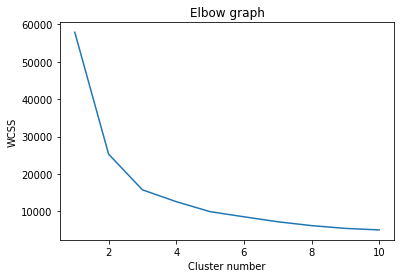

In [126]:
kmeans_rfm_scores = rfm_scores
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(kmeans_rfm_scores)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show() 

 2 ., 3. ve 6. kümelerden sonra WCSS eğrisi düzleşmeye başlıyor. Bu yüzden cluster değeri olarak bu 3 değerden birisi seçilmelidir. Burada cluster değeri (k) 3 alınmıştır.
 <p>
within-cluster sums of squares : cluster içindeki noktaların birbirinden uzaklıklarının karesi
</p>

clusters
0    3315
1    1994
2    4691
Name: recency, dtype: int64
Cluster 1


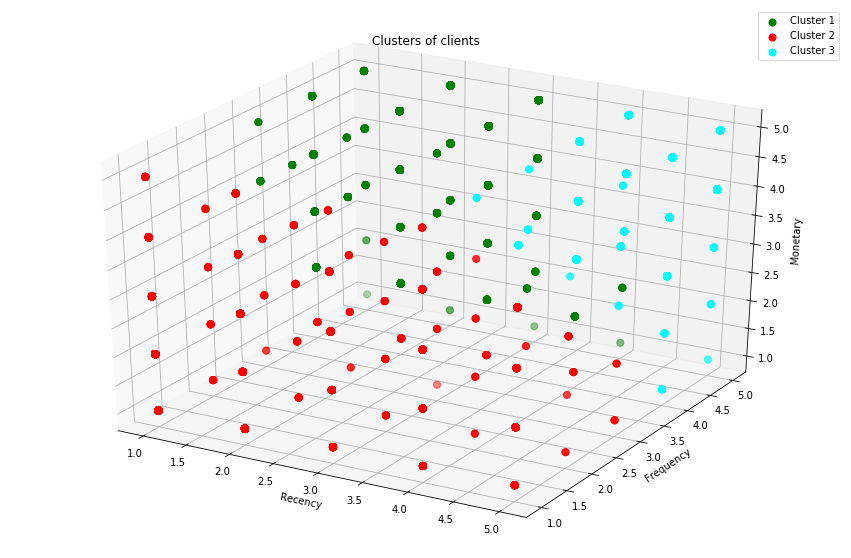

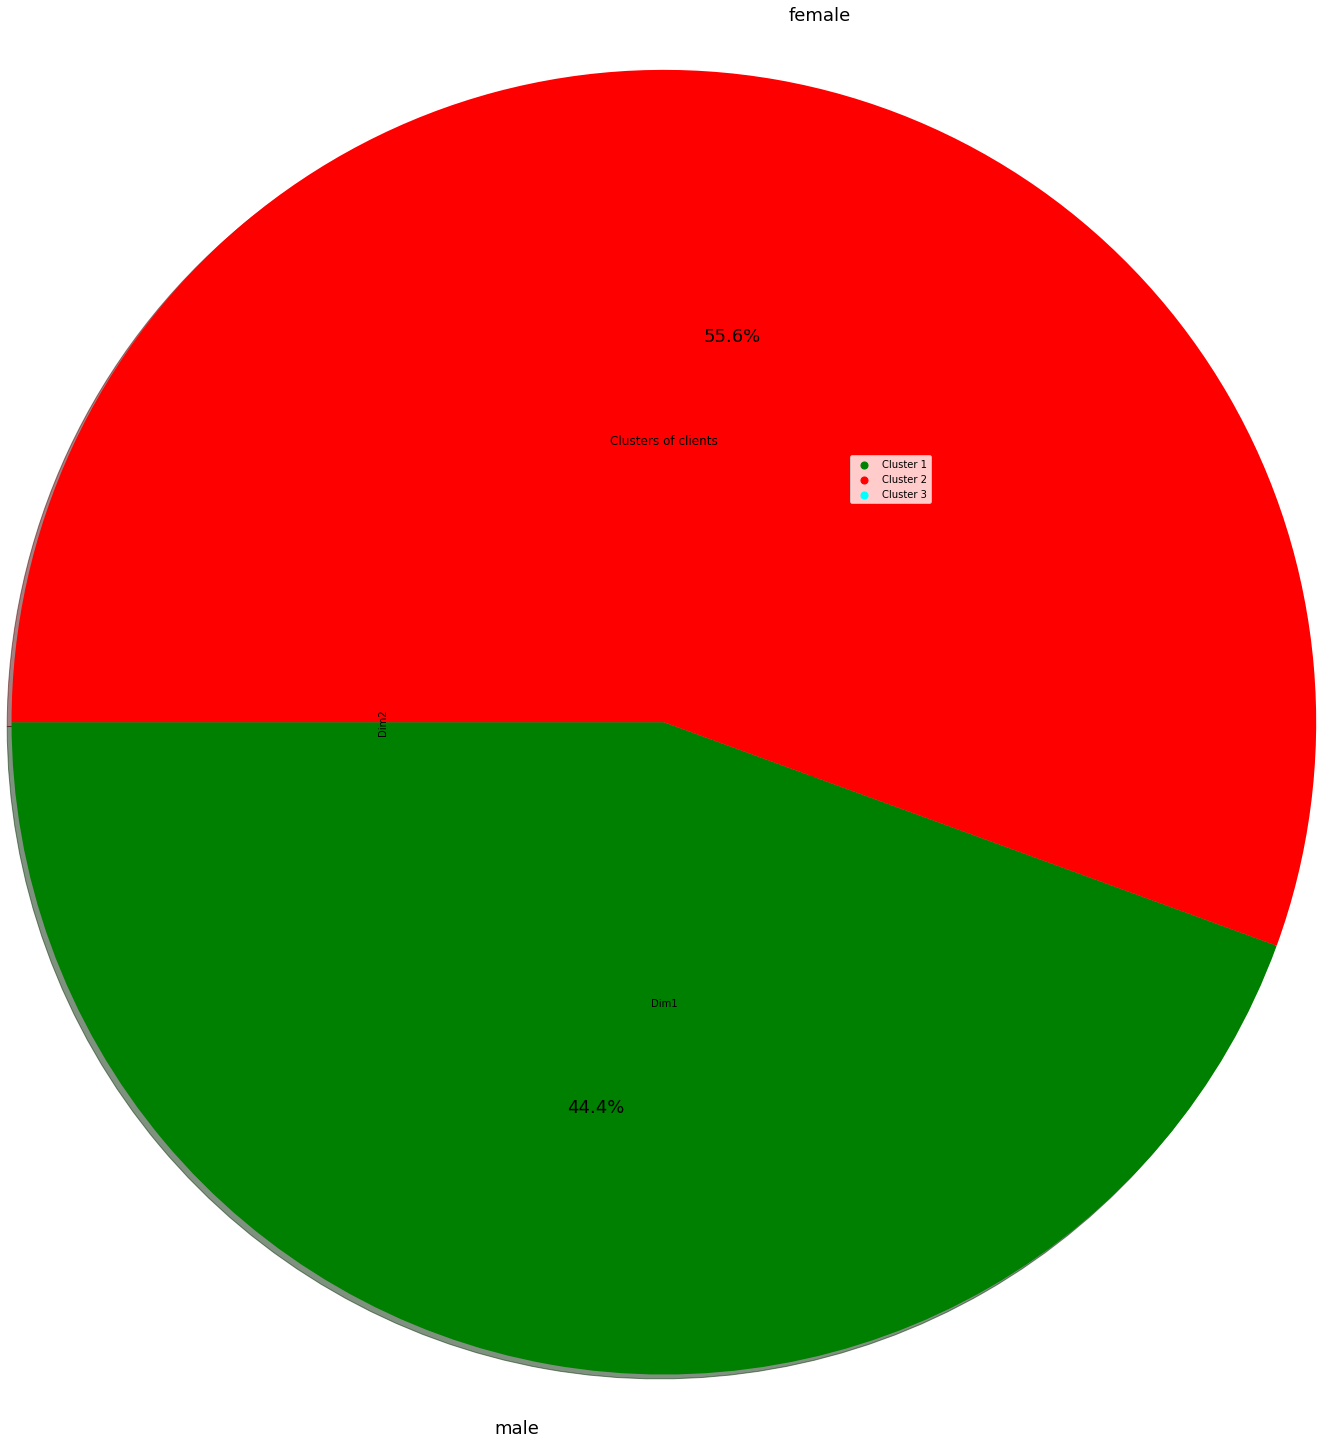

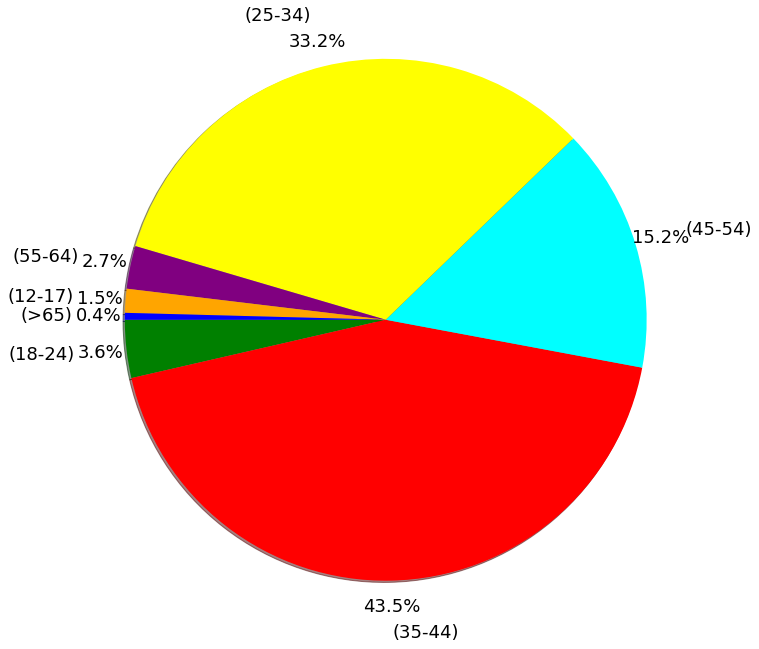

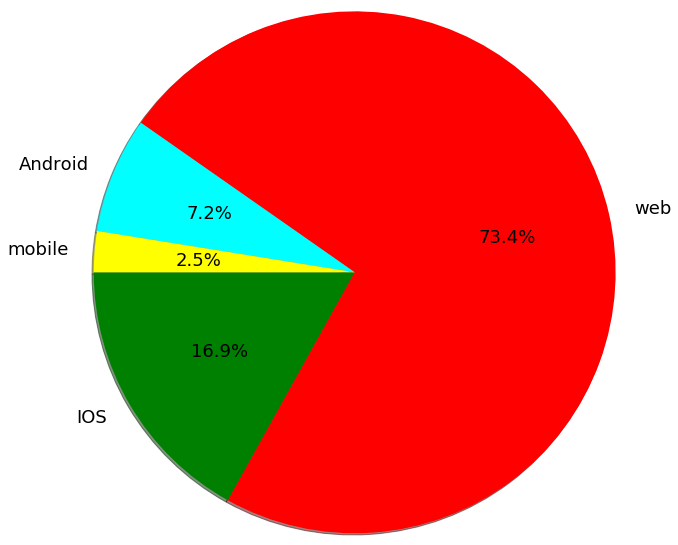

Cluster 3


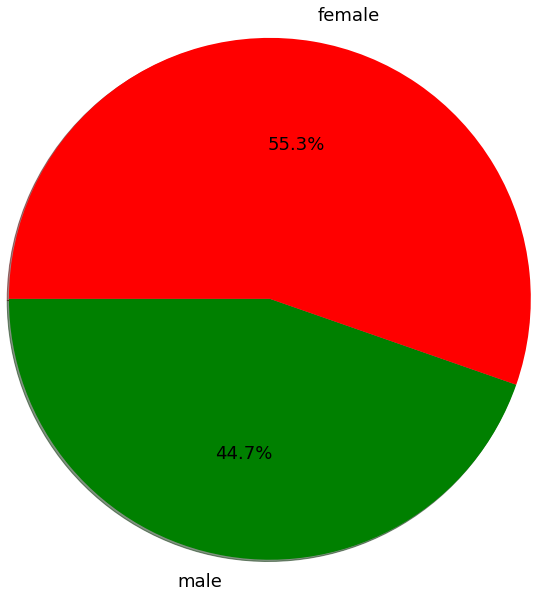

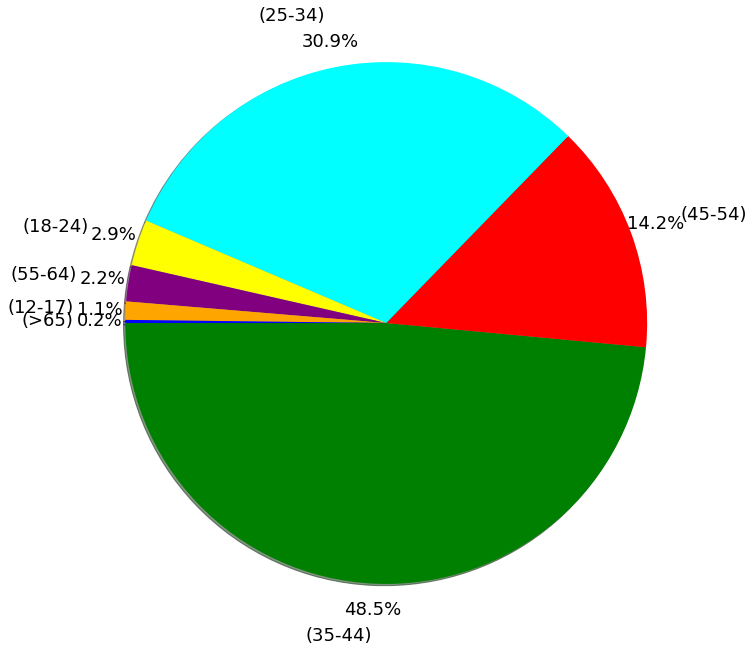

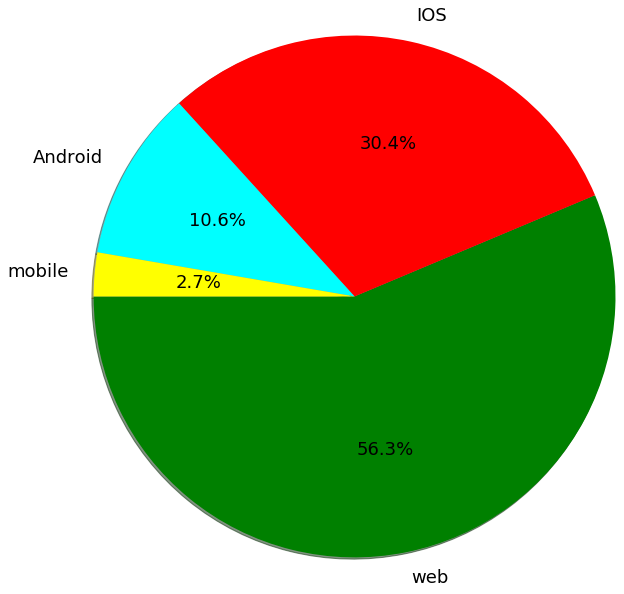

Cluster 2


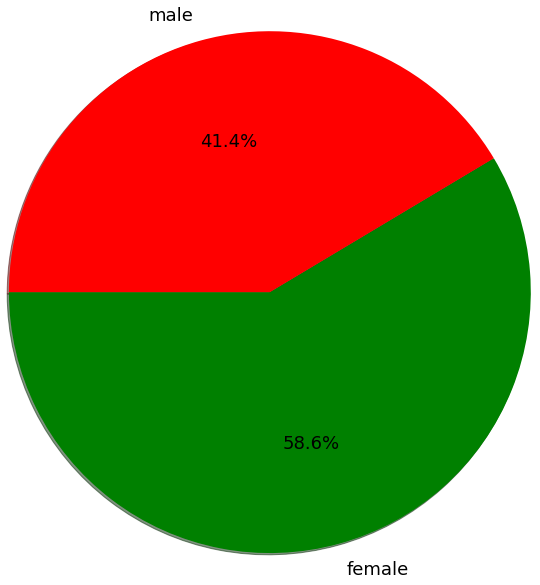

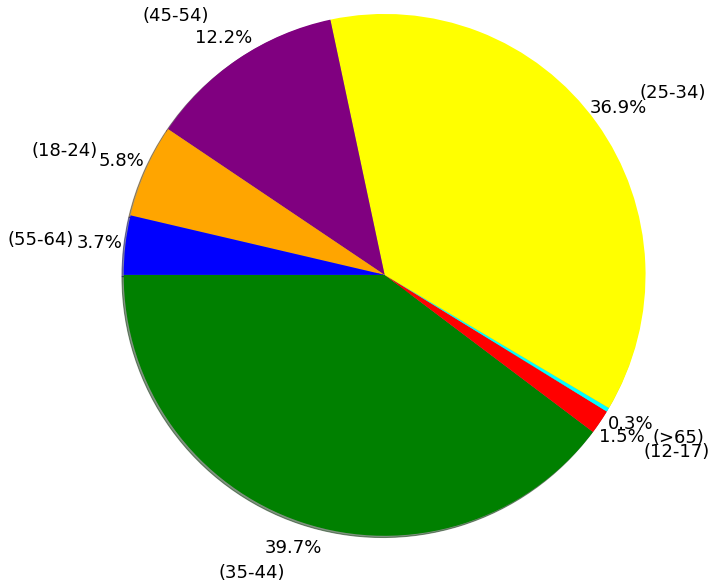

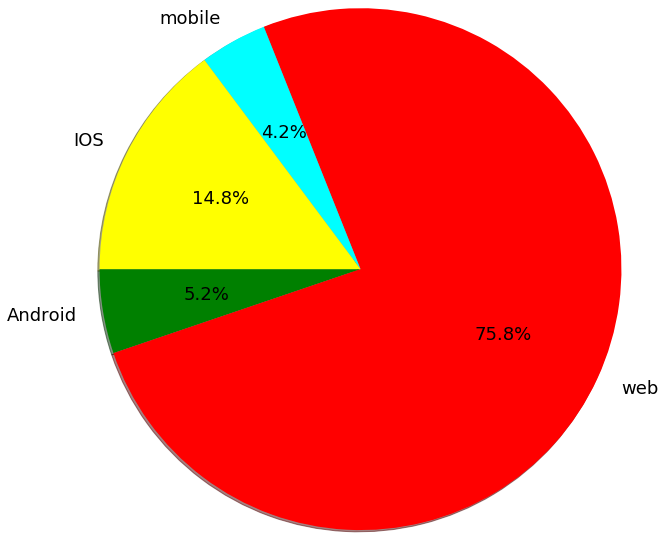

In [127]:
fitAndDrawKmeans(3, kmeans_rfm_scores, colors)

# Mean Shift

In [128]:
meanshift_rfm_scores = rfm_scores
bandwidth = estimate_bandwidth(meanshift_rfm_scores, quantile=0.25, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
clusters = ms.fit_predict(meanshift_rfm_scores)
meanshift_rfm_scores['clusters'] = clusters
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


clusters
0    4667
1    3310
2    1445
3     578
Name: recency, dtype: int64


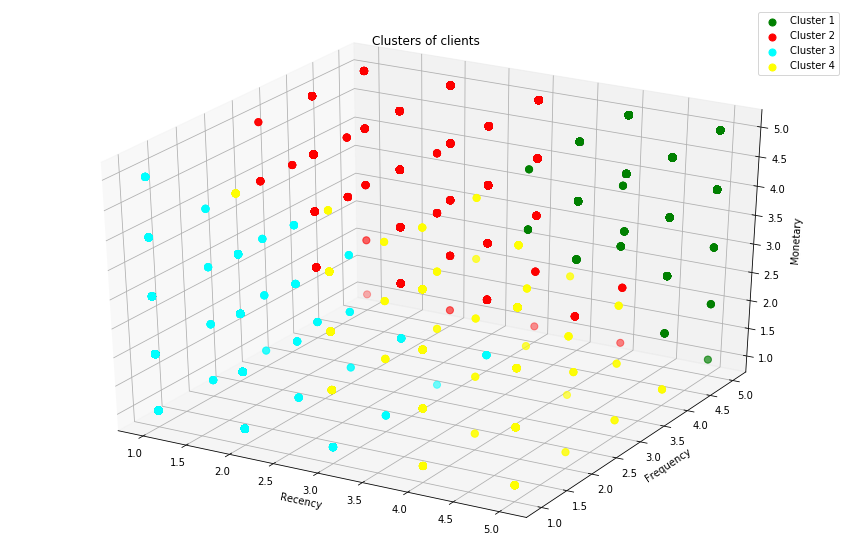

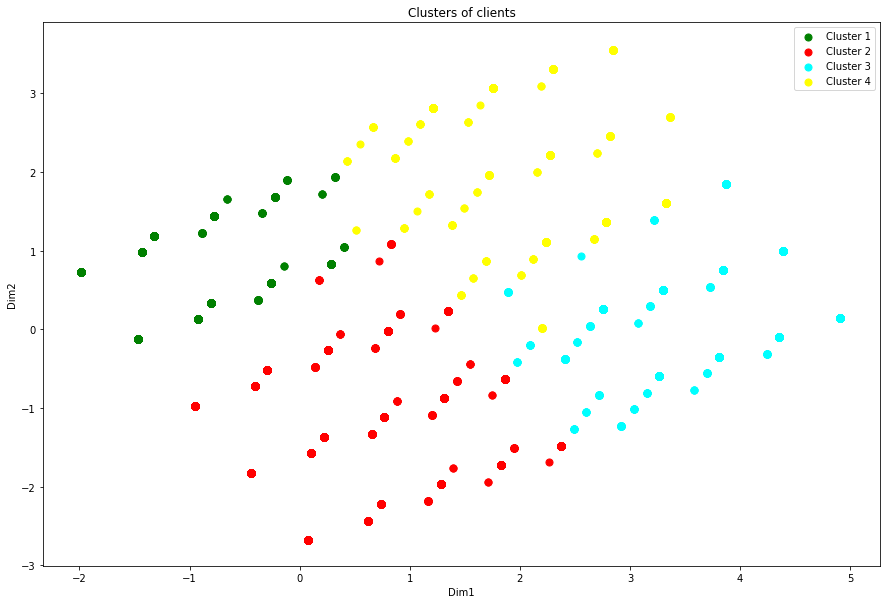

In [129]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
for i in range(0, n_clusters_):
    dx.scatter(meanshift_rfm_scores[meanshift_rfm_scores.clusters == i].recency, 
               meanshift_rfm_scores[meanshift_rfm_scores.clusters == i].frequency, 
               meanshift_rfm_scores[meanshift_rfm_scores.clusters == i].monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

draw2D(rfm_scores, clusters, n_clusters_, colors)
print(meanshift_rfm_scores.groupby('clusters').count()["recency"])

Cluster 2


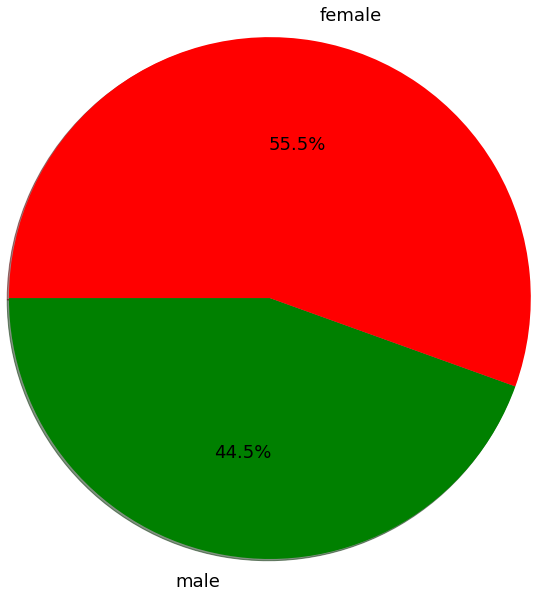

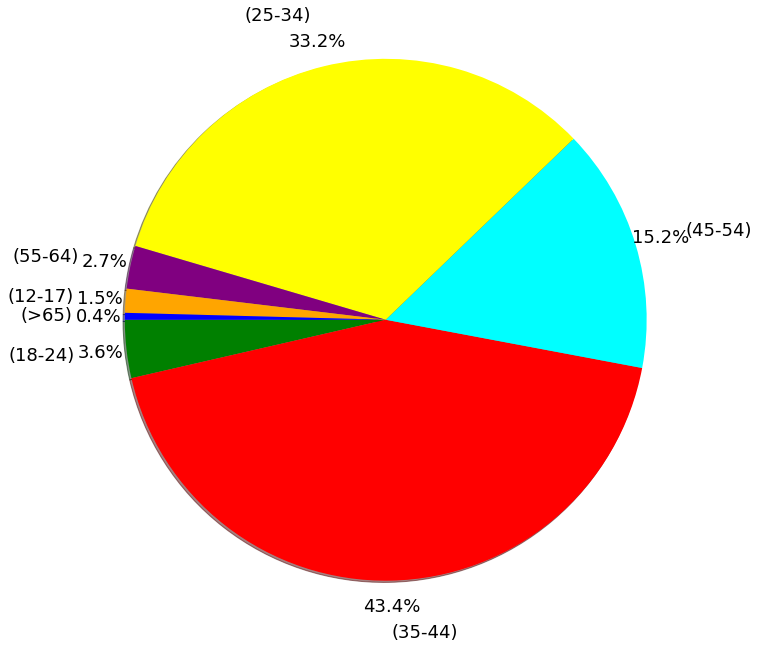

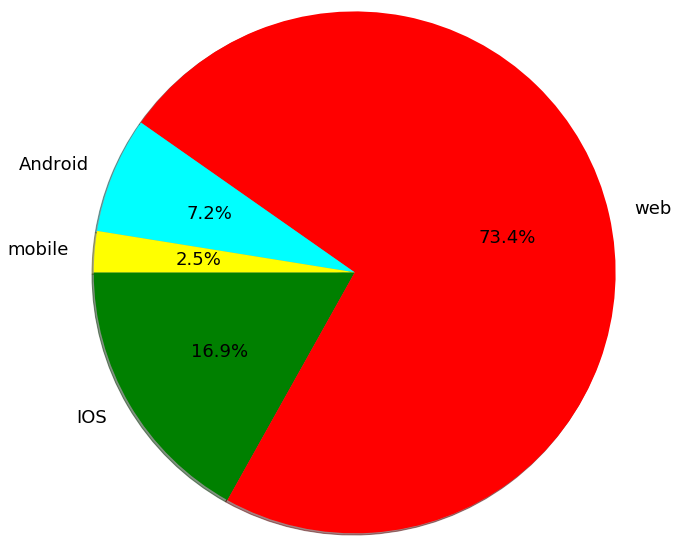

Cluster 1


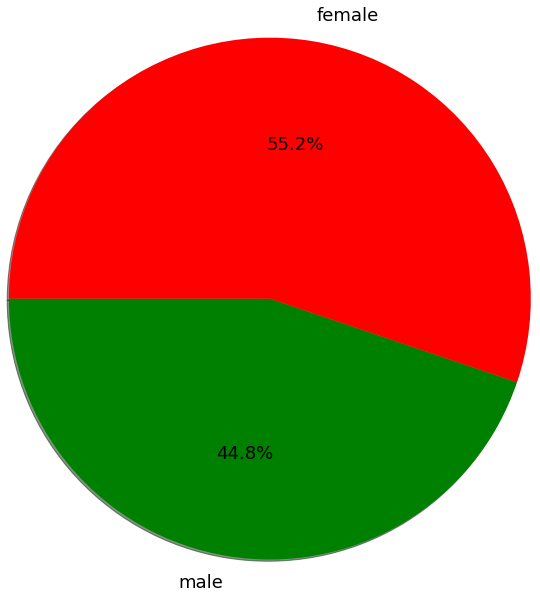

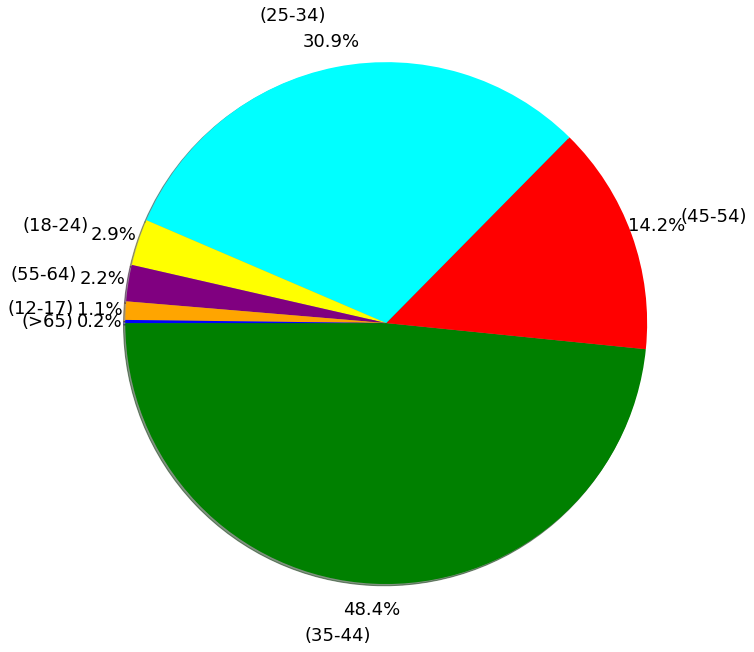

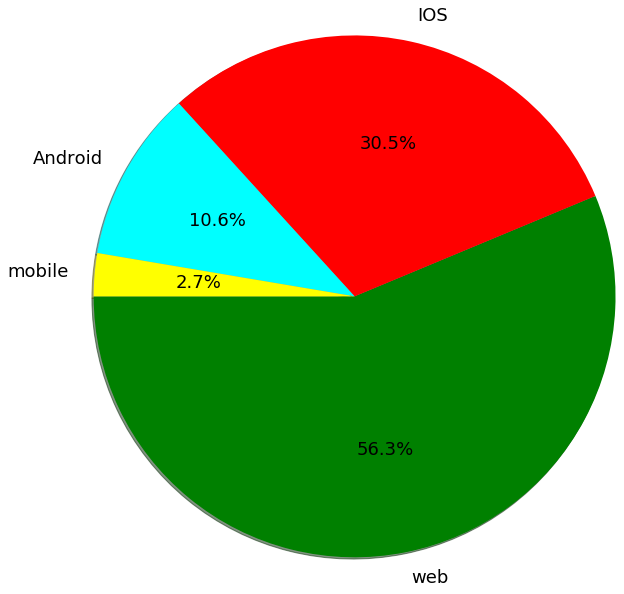

Cluster 4


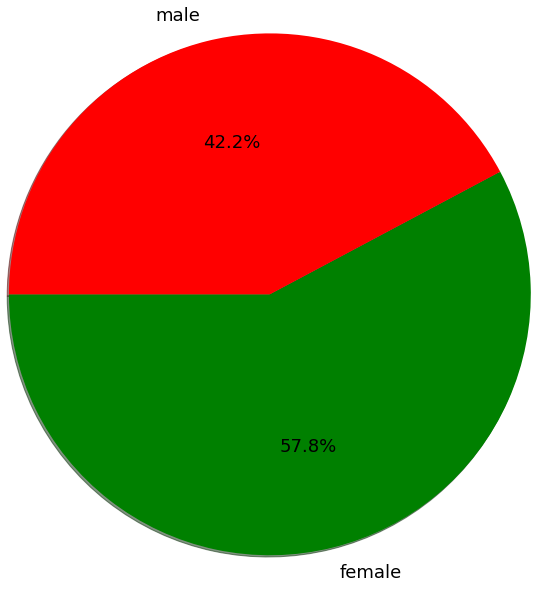

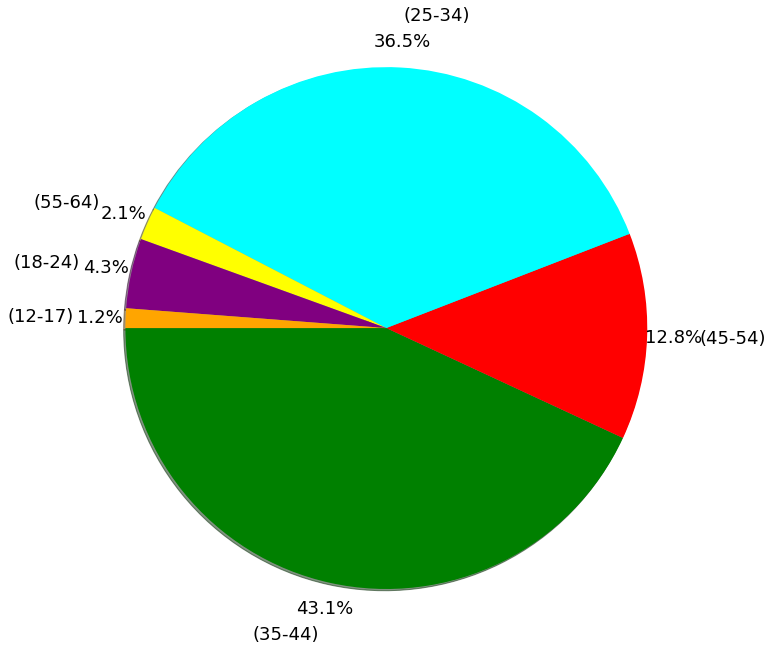

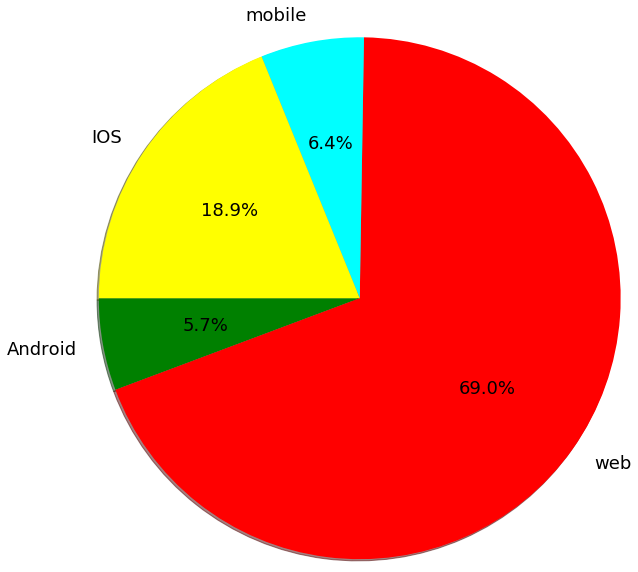

Cluster 3


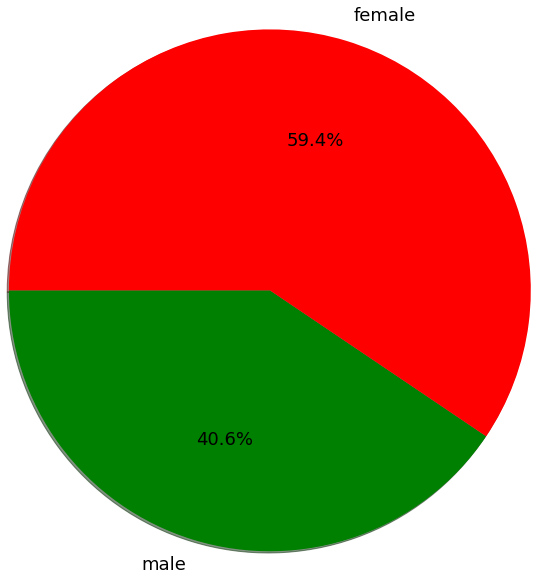

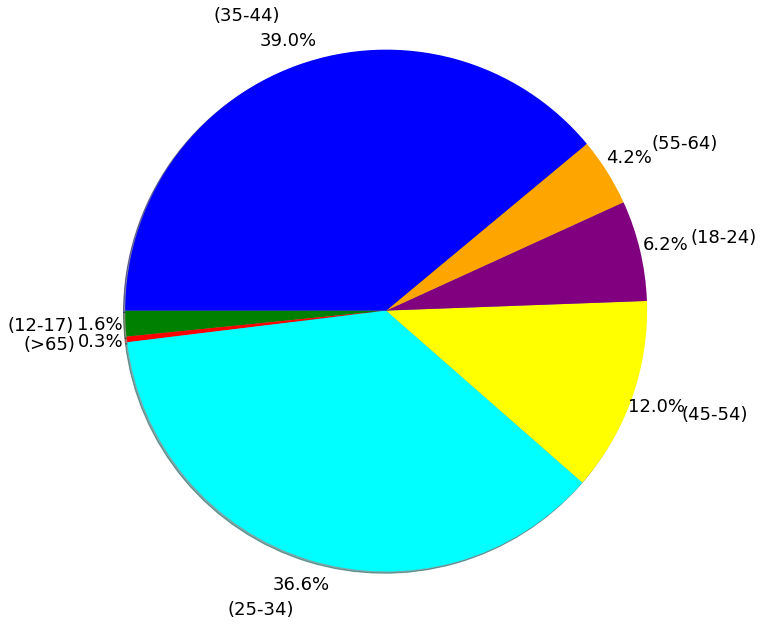

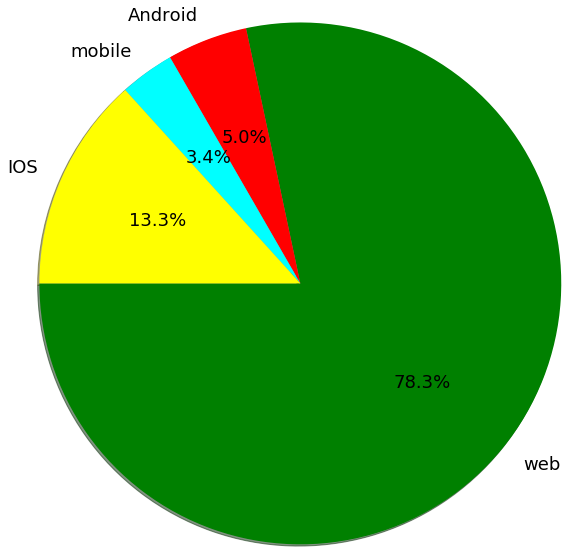

In [130]:
drawPieCharts(meanshift_rfm_scores, 1)

# DBScan

In [131]:
#min_samples = 1000 #DBSCAN min_samples parametresi değeri. Başka değerlerle de deneyebiliriz.
take_nrows = 10000
min_samples = take_nrows / 20
dbscan_rfm_scores = rfm_scores
db = DBSCAN(eps = 1.50, min_samples = min_samples)
clusters = db.fit_predict(dbscan_rfm_scores)

dbscan_rfm_scores['clusters'] = clusters
labels = db.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


clusters
-1     431
 0    8037
 1    1532
Name: recency, dtype: int64


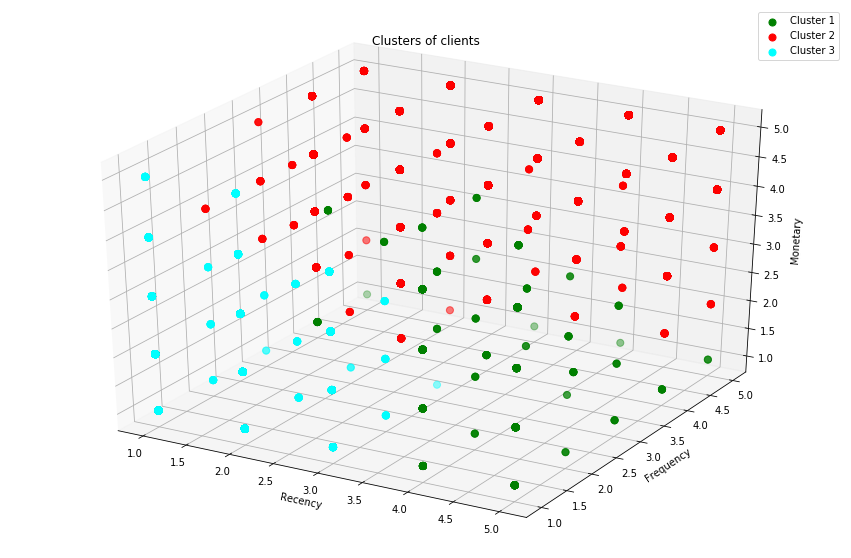

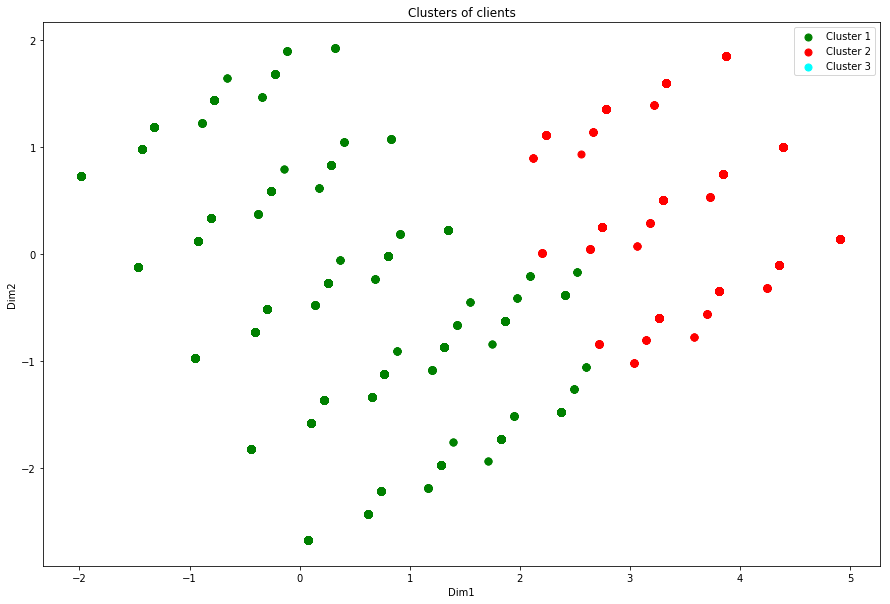

In [132]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
for i in range(-1, n_clusters_-1):
    dx.scatter(dbscan_rfm_scores[dbscan_rfm_scores.clusters == i].recency, 
               dbscan_rfm_scores[dbscan_rfm_scores.clusters == i].frequency, 
               dbscan_rfm_scores[dbscan_rfm_scores.clusters == i].monetary, 
               c = colors[i + 1], 
               label = 'Cluster ' + str(i + 2), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

draw2D(dbscan_rfm_scores, clusters, n_clusters_, colors)
print(dbscan_rfm_scores.groupby('clusters').count()["recency"])
#drawPieCharts(dbscan_rfm_scores, 2)

Cluster 2


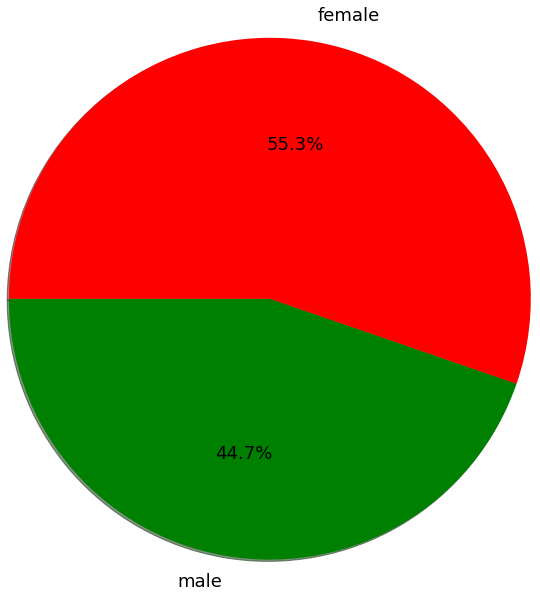

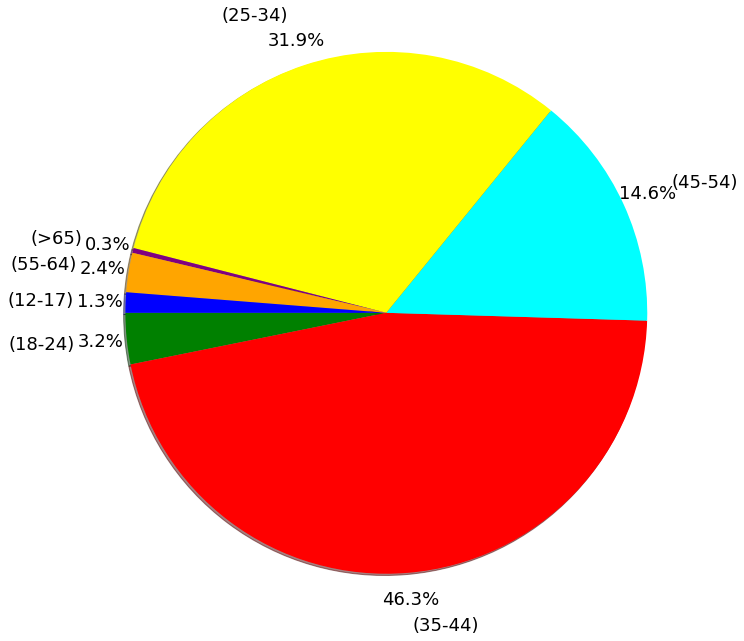

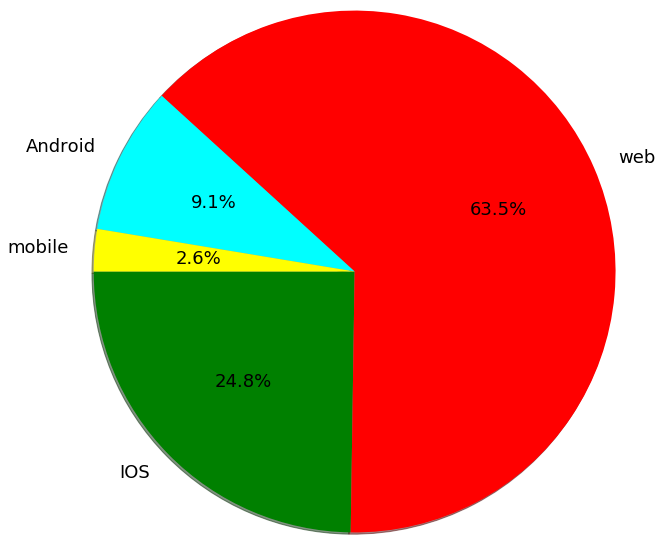

Cluster 3


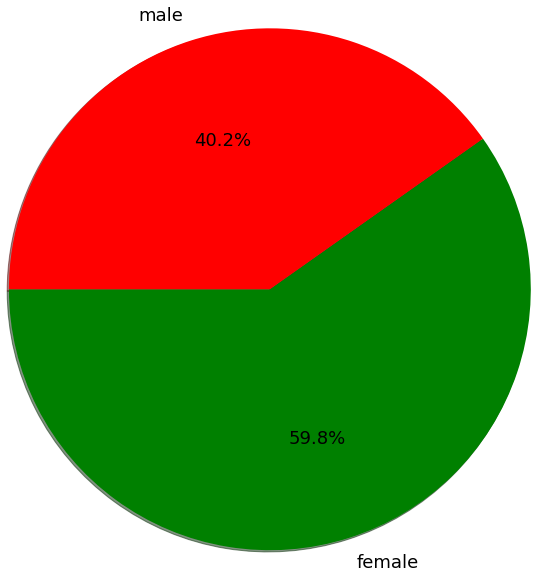

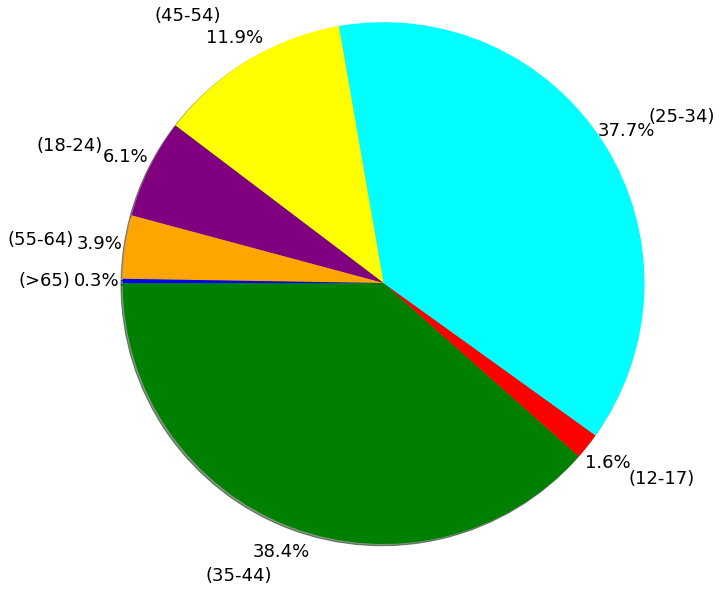

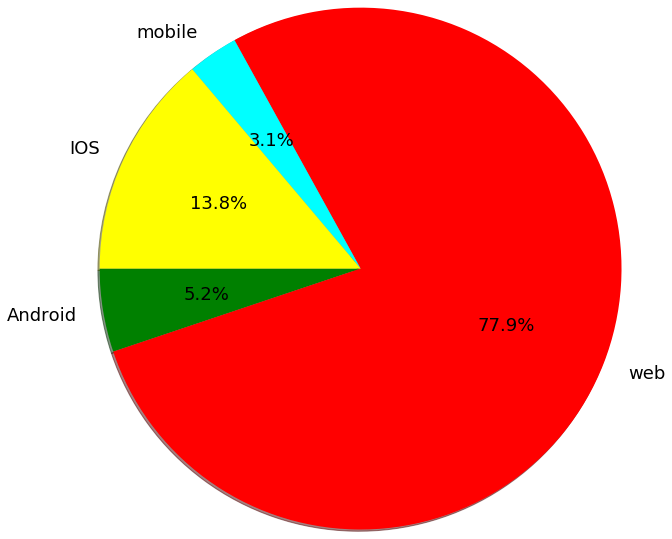

Cluster 1


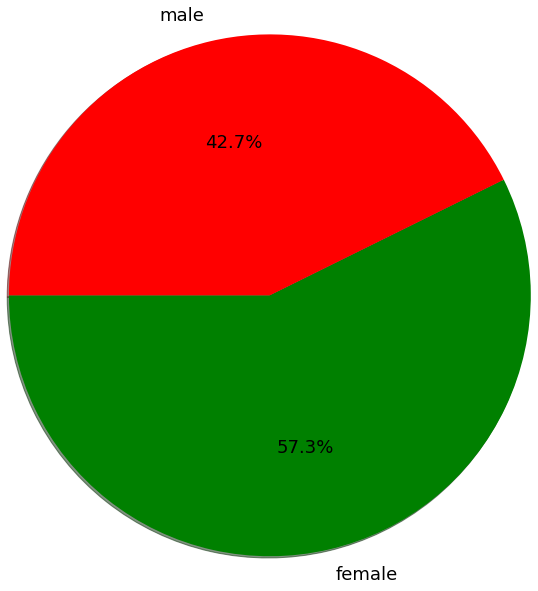

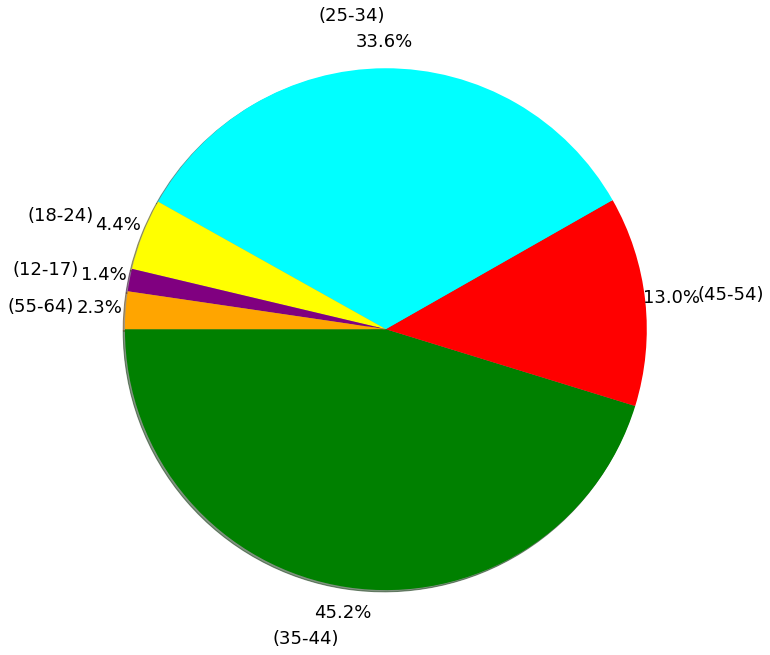

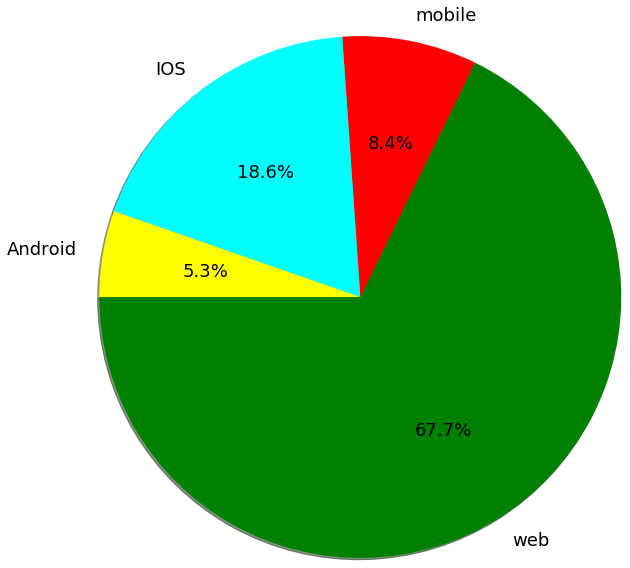

In [133]:
drawPieCharts(dbscan_rfm_scores, 2)

# Hierarchical (AgglomerativeClustering)

number of estimated clusters : 4
clusters
0    5744
1    1532
2    2397
3     327
Name: recency, dtype: int64


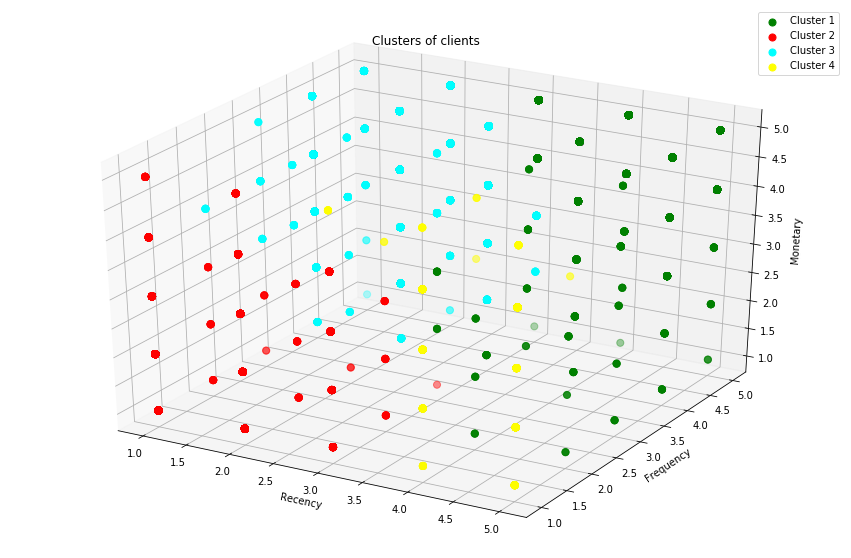

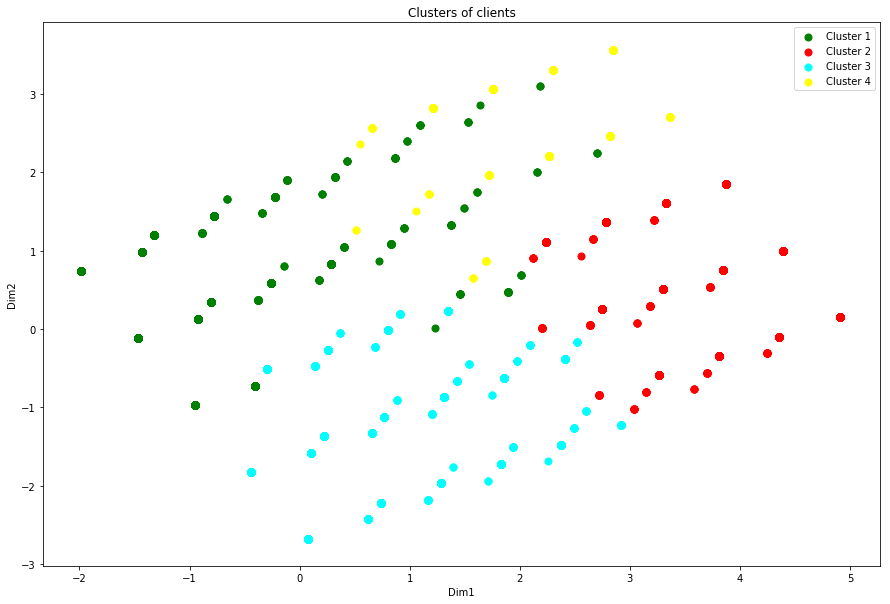

In [134]:
agglomerative_rfm_scores = rfm_scores
ac = AgglomerativeClustering(n_clusters  = 4)
clusters = ac.fit_predict(agglomerative_rfm_scores)

agglomerative_rfm_scores['clusters'] = clusters
labels = ac.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
for i in range(0, n_clusters_):
    dx.scatter(agglomerative_rfm_scores[agglomerative_rfm_scores.clusters == i].recency, 
               agglomerative_rfm_scores[agglomerative_rfm_scores.clusters == i].frequency, 
               agglomerative_rfm_scores[agglomerative_rfm_scores.clusters == i].monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i + 1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()
draw2D(agglomerative_rfm_scores, clusters, n_clusters_, colors)
print(agglomerative_rfm_scores.groupby('clusters').count()["recency"])

Cluster 3


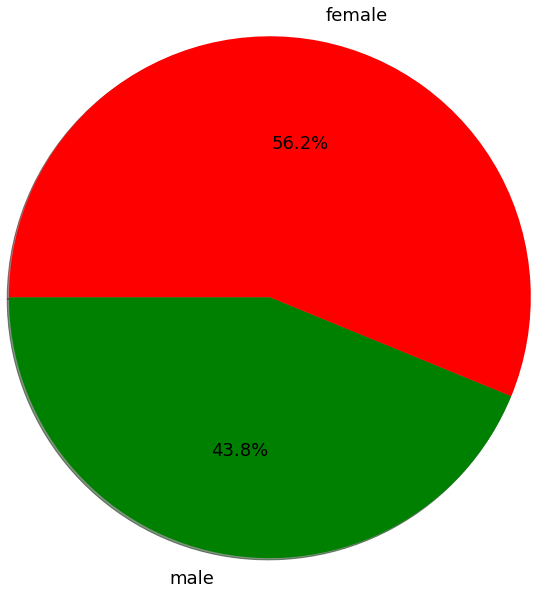

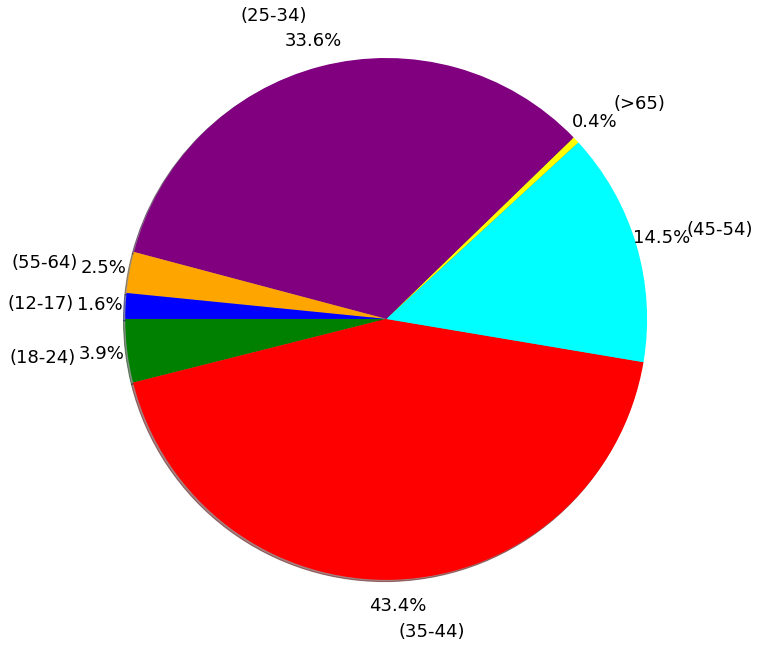

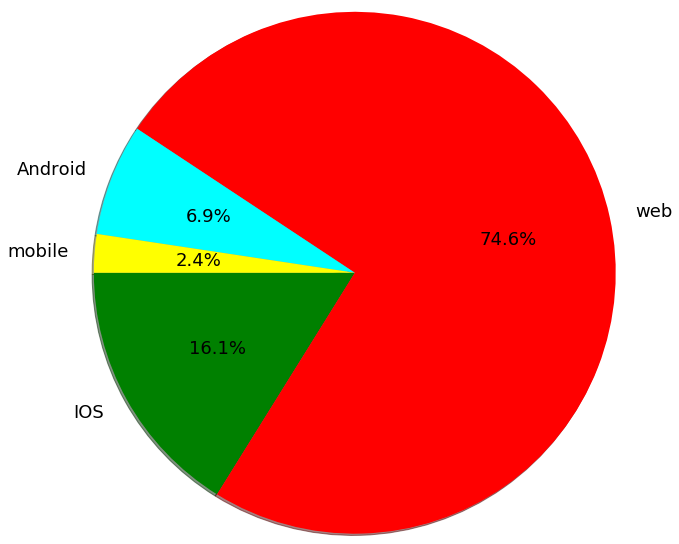

Cluster 1


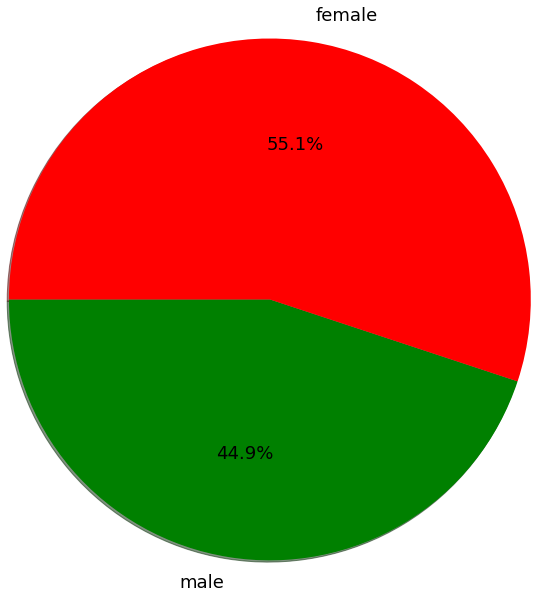

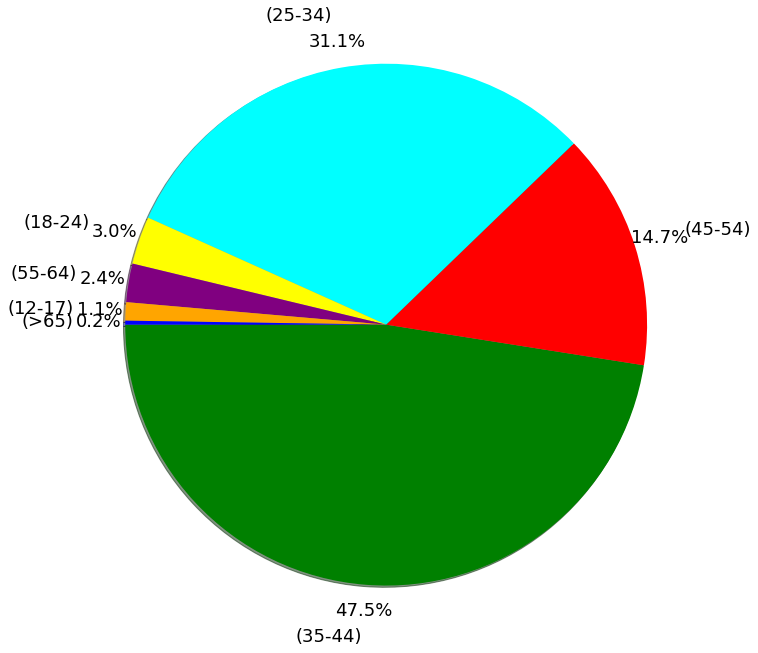

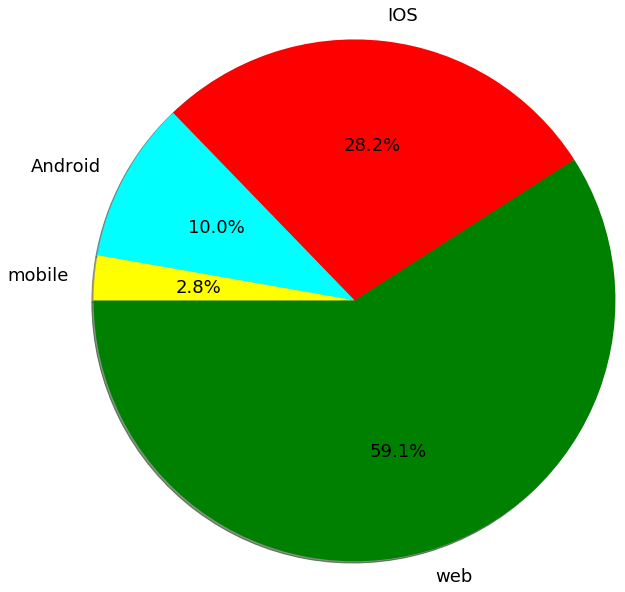

Cluster 2


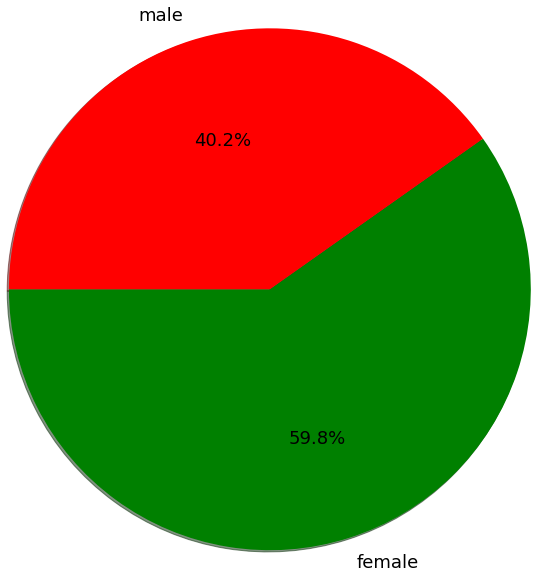

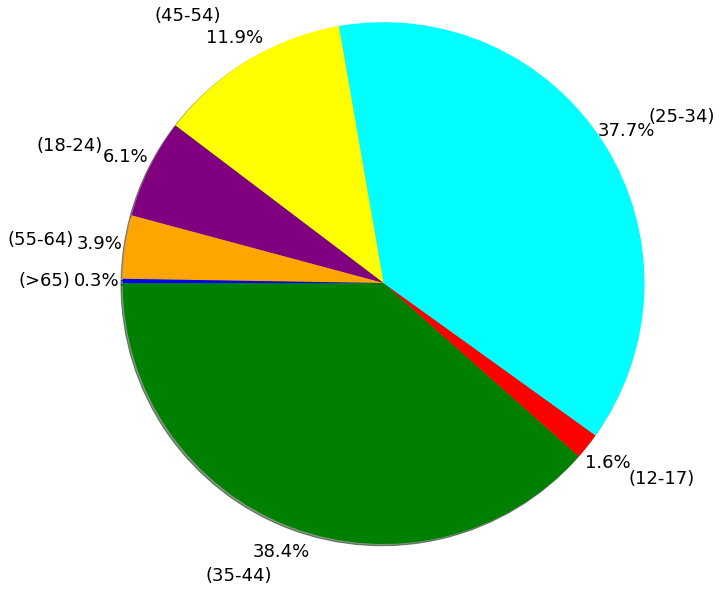

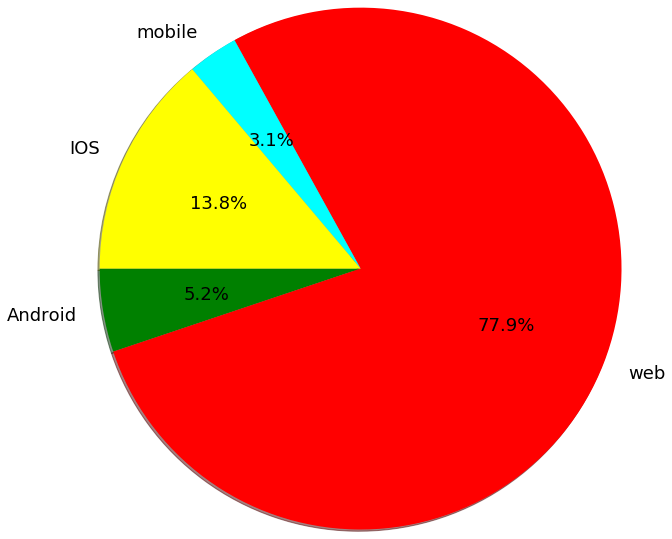

Cluster 4


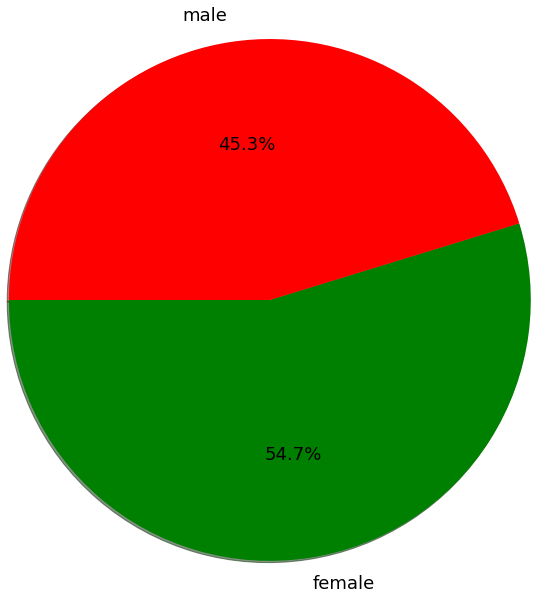

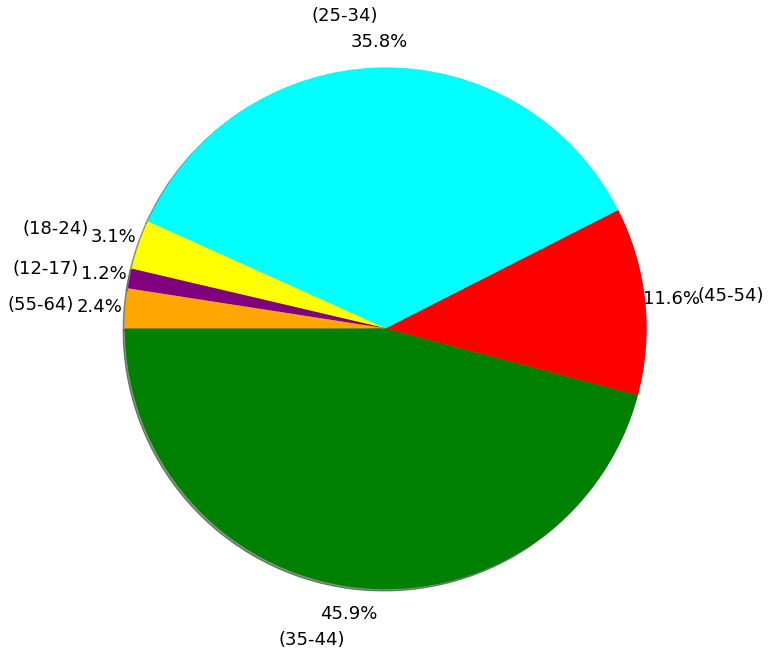

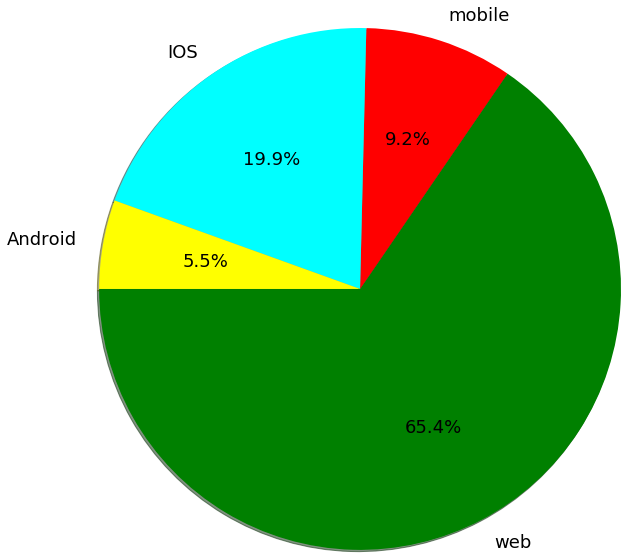

In [135]:
drawPieCharts(agglomerative_rfm_scores, 1)